In [469]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv('BankNote_Authentication.csv')

In [470]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [471]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [472]:
data['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

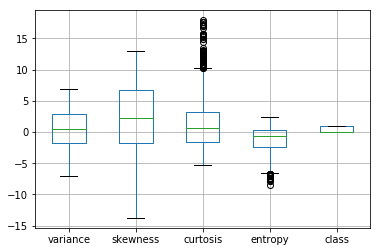

In [473]:
data.boxplot()

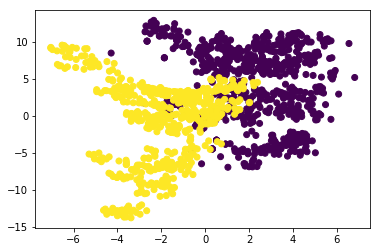

In [474]:
plt.scatter(data['variance'],data['skewness'],c=data['class'])

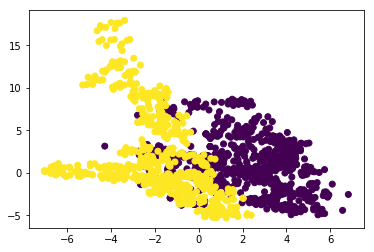

In [475]:
plt.scatter(data['variance'],data['curtosis'],c=data['class'])

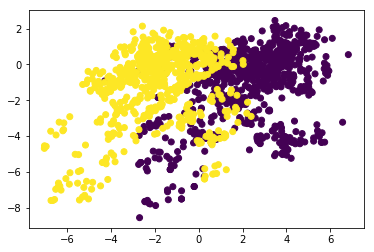

In [476]:
plt.scatter(data['variance'],data['entropy'],c=data['class'])

All right looks not that complicated

In [477]:
#import keras stuff
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation 
from keras.optimizers import SGD
from keras.optimizers import rmsprop

In [478]:
#Data
features_data=data.drop(['class'],axis=1)
labels_data=data[['class']]
num_classes=2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
#Rescale feature range
scaler = MinMaxScaler(feature_range=(0.2, 0.8))
features=scaler.fit_transform(features_data)
#One hot encode labels
labels = keras.utils.to_categorical(labels_data, num_classes)
#enc = OneHotEncoder(handle_unknown='ignore')
#labels=enc.fit_transform(labels_data)
#Split the data test, train
x_train, x_test, y_train, y_test = train_test_split(features, labels,test_size = 0.25, shuffle=True)
print('train feat. shape:',x_train.shape)
print('train label. shape:',y_train.shape)
#validation_data=(x_test, y_test)

train feat. shape: (1029, 4)
train label. shape: (1029, 2)


In [479]:
#F1 score 
from keras.callbacks import Callback
from sklearn.metrics import precision_recall_fscore_support
class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []
 
    def on_epoch_end(self, epoch, logs={}):
        #val_predict = (np.asarray(self.model.predict(self.validation_data[0]))).round()
        val_predict1=model.predict(self.validation_data[0]).round()
        val_predict=val_predict1[:,0]
        #val_targ = self.validation_data[1]
        val_targ=self.validation_data[1][:,0]
        val_f1 = precision_recall_fscore_support(val_targ, val_predict)[2]
        self.val_f1s.append(val_f1)
        print('f1 score',val_f1)
metrics = Metrics()

In [480]:
#Make model
model=Sequential()
#Hidden layer 1
model.add(Dense(100,activation='sigmoid',input_dim=4))
#Hidden layer 2
model.add(Dense(100,activation='sigmoid'))
#Dropout layer
model.add(Dropout(0.25))
#Output layer
model.add(Dense(2, activation='softmax'))
#See a model summary
model.summary()
#Compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
#Fit the model
model.fit(x_train, y_train, epochs=10, batch_size=18,validation_data=(x_test, y_test), verbose=1,callbacks=[metrics])
#Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_234 (Dense)            (None, 100)               500       
_________________________________________________________________
dense_235 (Dense)            (None, 100)               10100     
_________________________________________________________________
dropout_79 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_236 (Dense)            (None, 2)                 202       
Total params: 10,802
Trainable params: 10,802
Non-trainable params: 0
_________________________________________________________________
Train on 1029 samples, validate on 343 samples
Epoch 1/10
1029/1029 [==============================] - 3s 3ms/step - loss: 0.7175 - acc: 0.5520 - val_loss: 0.7325 - val_acc: 0.5073
f1 score [0.         0.67311412]
Epoch 2/10
1029/1029 [==============================] - 

/Users/franciumpnc/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1 score [0.         0.67311412]
Epoch 3/10
1029/1029 [==============================] - 0s 180us/step - loss: 0.7080 - acc: 0.5432 - val_loss: 0.6884 - val_acc: 0.5073
f1 score [0.         0.67311412]
Epoch 4/10
1029/1029 [==============================] - 0s 192us/step - loss: 0.7052 - acc: 0.5569 - val_loss: 0.7202 - val_acc: 0.5073
f1 score [0.         0.67311412]
Epoch 5/10
1029/1029 [==============================] - 0s 191us/step - loss: 0.7067 - acc: 0.5306 - val_loss: 0.6789 - val_acc: 0.5160
f1 score [0.03488372 0.6770428 ]
Epoch 6/10
1029/1029 [==============================] - 0s 195us/step - loss: 0.6975 - acc: 0.5335 - val_loss: 0.6980 - val_acc: 0.5073
f1 score [0.         0.67311412]
Epoch 7/10
1029/1029 [==============================] - 0s 189us/step - loss: 0.6745 - acc: 0.5763 - val_loss: 0.6737 - val_acc: 0.4927
f1 score [0.66015625 0.        ]
Epoch 8/10
1029/1029 [==============================] - 0s 188us/step - loss: 0.6768 - acc: 0.5656 - val_loss: 0.6861 - va

In [481]:
sp=model.predict(x_test).round()
s_pred=sp[:,0]
s_true=y_test[0:][:,0]
precision_recall_fscore_support(s_true,s_pred,average=None)

(array([0.66115702, 0.91089109]),
 array([0.94674556, 0.52873563]),
 array([0.77858881, 0.66909091]),
 array([169, 174]))

In [482]:
#Sanity check
from sklearn.metrics import confusion_matrix
confusion_matrix(s_true,s_pred)

array([[160,   9],
       [ 82,  92]])

In [483]:
#Do K fold cross validation
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=40)
for train, test in kfold.split(features, labels):
    #Make model
    model=Sequential()
#Hidden layer 1
    model.add(Dense(100,activation='sigmoid',input_dim=4))
#Hidden layer 2
    model.add(Dense(100,activation='sigmoid'))
#Dropout layer
    model.add(Dropout(0.25))
#Output layer
    model.add(Dense(2, activation='softmax'))
#See a model summary
    #model.summary()
#Compile model
    model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
#Fit the model
    model.fit(features[train], labels[train], epochs=50, batch_size=18,validation_data=(features[test], labels[test]), verbose=0,callbacks=[metrics])
#Evaluate the model
    score = model.evaluate(features[test], labels[test], verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    sp=model.predict(x_test).round()
    s_pred=sp[:,0]
    s_true=y_test[0:][:,0]
    precision_recall_fscore_support(s_true,s_pred,average=None)
    confusion_matrix(s_true,s_pred)
    print("#########")

f1 score [0.         0.69668246]
f1 score [0.         0.69668246]
f1 score [0.         0.69668246]
f1 score [0.63523573 0.        ]
f1 score [0.         0.69668246]
f1 score [0.         0.69668246]
f1 score [0.         0.69668246]
f1 score [0.1971831  0.72058824]
f1 score [0.80487805 0.84210526]
f1 score [0.40740741 0.75257732]
f1 score [0.07518797 0.70503597]
f1 score [0.74235808 0.81619938]
f1 score [0.32679739 0.74055416]
f1 score [0.80866426 0.80586081]
f1 score [0.82539683 0.85234899]
f1 score [0.75862069 0.82389937]
f1 score [0.80985915 0.79699248]
f1 score [0.75336323 0.83180428]
f1 score [0.74074074 0.83233533]
f1 score [0.83458647 0.84507042]
f1 score [0.84732824 0.86111111]
f1 score [0.80334728 0.8488746 ]
f1 score [0.848      0.87333333]
f1 score [0.86381323 0.88054608]
f1 score [0.83870968 0.86754967]
f1 score [0.84552846 0.875     ]
f1 score [0.85123967 0.88311688]
f1 score [0.82352941 0.88145897]
f1 score [0.86746988 0.89036545]
f1 score [0.87649402 0.89632107]
f1 score [

f1 score [0.90212766 0.92651757]
f1 score [0.90212766 0.92651757]
f1 score [0.90212766 0.92651757]
f1 score [0.91666667 0.93506494]
f1 score [0.91596639 0.93548387]
f1 score [0.92116183 0.93811075]
f1 score [0.92116183 0.93811075]
f1 score [0.93877551 0.95049505]
f1 score [0.93927126 0.95016611]
f1 score [0.93333333 0.94197952]
Test loss: 0.14913858679959374
Test accuracy: 0.9379562026392805
#########
